<a href="https://colab.research.google.com/github/sainiankur63/Master_Modular_project/blob/main/Third_Model_Acurracy_87_95_per.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Important Steps** <br>
**1) Removing Outliers**

1.   PRICE : In between ( 100 USD and 60k USD )
2.   YEAR : taking year greater than 1990
3.   ODOMETER : In between ( 100 miles and 250000 miles)

**2) Drop Columns** <br> 
[ 'id' , 'url', 'region' , 'region_url ', 'VIN' , 'image_url' , 'description' , 'county' , 'state' , 'model' , 'lat' , 'long' ,  'posting_date' ]

**3) Null Values**


1. df['transmission'] = df['transmission'].fillna(df.transmission.mode()[0])
2. df['fuel'] = df['fuel'].fillna(df.fuel.mode()[0]) 
3. df['title_status'] = df['title_status'].fillna(df['title_status'].mode()[0])
4. df['manufacturer'] = df['manufacturer'].fillna(df['manufacturer'].mode()[0])
5. df['condition'] = df['condition'].fillna(df['condition'].mode()[0])
6. df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode()[0])
7. df['drive'] = df['drive'].fillna(df['drive'].mode()[0])
8. df['type'] = df['type'].fillna(df['type'].mode()[0])
9. df['paint_color'] = df['paint_color'].fillna(df['paint_color'].mode()[0])

**4) Normalizaton**
1.   Standard Scalar
2.   Min Max Scalar

**5) Model Outcome**

1.   Random Forest :
                    n_estimators : 300
                    Model Score: 0.8795253332237268
                    Mean Absolute Error: 2102.0
                    Mean Squared Error: 20169880.59
                    Root Mean Squared Error: 4491.09
2.   Multi Linear Regression :
                    Model Score: 0.5369479343200012  
                    Mean Absolute Error: 6489.38
                    Mean Squared Error: 77524222.51
                    Root Mean Squared Error: 8804.78  
  




In [1]:
!pip install pandas numpy pandas matplotlib seaborn opendatasets --quiet

In [2]:
!pip install imbalanced-learn

In [3]:
# To show all columns' names on a large pandas dataframe
import pandas as pd
pd.set_option('display.max_columns', None)

In [4]:
import pandas as pd
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,4)

In [5]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/austinreese/craigslist-carstrucks-data'


od.download(dataset_url)

data_dir = './craigslist-carstrucks-data'

100%|██████████| 262M/262M [00:02<00:00, 125MB/s]


In [6]:
df = pd.read_csv(data_dir+"/vehicles.csv")

### **Checking outliers for each labels Outlier Detection**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

### **First Checking Outliers for Numeric data columns** <br>
Numeric columns : [ price ,year , odometer , lat , long ] <br>




In [8]:
df.describe().applymap(lambda x: f"{x:0.3f}")

,id,price,year,odometer,county,lat,long
count,426880.000,426880.000,425675.000,422480.000,0.000,420331.000,420331.000
mean,7311486634.224,75199.033,2011.235,98043.331,nan,38.494,-94.749
std,4473170.413,12182282.174,9.452,213881.501,nan,5.842,18.365
min,7207408119.000,0.000,1900.000,0.000,nan,-84.122,-159.828
25%,7308143339.250,5900.000,2008.000,37704.000,nan,34.602,-111.940
50%,7312620821.000,13950.000,2013.000,85548.000,nan,39.150,-88.433
75%,7315253543.500,26485.750,2017.000,133542.500,nan,42.399,-80.832
max,7317101084.000,3736928711.000,2022.000,10000000.000,nan,82.391,173.886


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


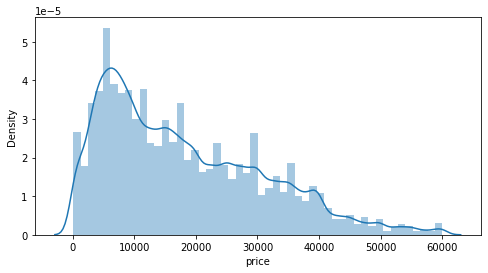

In [9]:
sns.distplot(df[(df.price >=  100) & (df.price <= 60000)].price)

In [10]:
df[(df.price >= 60000)].shape

(6320, 26)

In [11]:
# Outlier removal in price column

#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.price.quantile(0.75)-df.price.quantile(0.25)

#### Extreme outliers
lower_lim_price = df['price'].quantile(0.25)-(IQR*3)
upper_lim_price = df['price'].quantile(0.75)+(IQR*3)
print(lower_lim_price), print(upper_lim_price)

-55857.25
88243.0


(None, None)

In [12]:
lower_lim = df['price'].quantile(0.25)-(IQR*1.5)
upper_lim = df['price'].quantile(0.75)+(IQR*1.5)
print(lower_lim), print(upper_lim)

-24978.625
57364.375


(None, None)

In [13]:
# Taking 100 dollars as min and 60k dollars max value for price

df = df[(df.price >=  100) & (df.price <= 60000)]

In [14]:
df.shape

(384392, 26)

In [15]:
# Outlier removal in year column

df['year'].isnull().sum()

1018

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


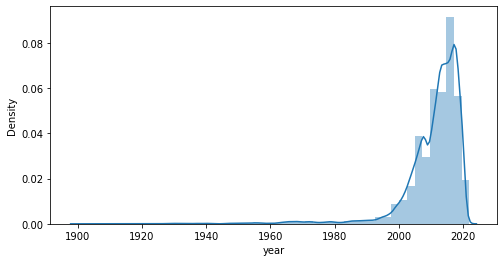

In [16]:
# checking the distribution of year column
import seaborn as sns

sns.distplot(df['year'].dropna())

**Observation:**
1. Data is left Skewed

In [17]:
#import seaborn as sns
#sns.boxplot(df['year'])

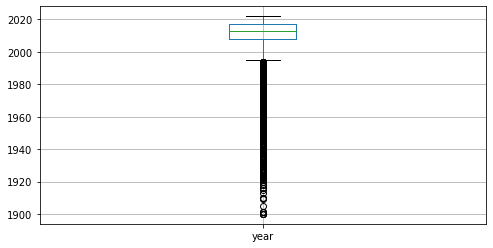

In [18]:
import seaborn as sns
figure=df.boxplot(column="year")

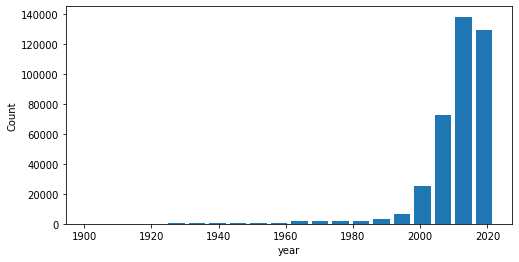

In [19]:
# Histogram for year column

plt.hist(df.year, bins=20, rwidth=0.8)
plt.xlabel('year')
plt.ylabel('Count')
plt.show()

In [20]:
df['year'].describe()

count    383374.000000
mean       2010.955506
std           9.504683
min        1900.000000
25%        2008.000000
50%        2013.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64

As per the above graphs it is clearly shows that data of year is left skewed. 
For skewed Data , IQR techniqie is implement to remove outliers

In [21]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.year.quantile(0.75)-df.year.quantile(0.25)

In [22]:
lower_lim_year = df['year'].quantile(0.25)-(IQR*1.5)
upper_lim_year = df['year'].quantile(0.75)+(IQR*1.5)
print(lower_lim_year), print(upper_lim_year)

1994.5
2030.5


(None, None)

In [23]:
#### Extreme outliers
#lower_bridge=df['year'].quantile(0.25)-(IQR*3)
#upper_bridge=df['year'].quantile(0.75)+(IQR*3)
#print(lower_bridge), print(upper_bridge)

df.describe().applymap(lambda x: f"{x:0.3f}")

,id,price,year,odometer,county,lat,long
count,384392.000,384392.000,383374.000,382171.000,0.000,380930.000,380930.000
mean,7311481807.202,18095.776,2010.956,99475.075,nan,38.529,-94.354
std,4475633.430,13008.848,9.505,199702.266,nan,5.837,18.137
min,7207408119.000,100.000,1900.000,0.000,nan,-84.122,-159.720
25%,7308130373.250,7295.000,2008.000,39348.000,nan,34.736,-110.962
50%,7312630621.500,14999.000,2013.000,88706.000,nan,39.260,-88.001
75%,7315251517.000,26990.000,2017.000,136462.000,nan,42.364,-80.830
max,7317101084.000,60000.000,2022.000,10000000.000,nan,82.391,167.630


In [24]:
df.shape

(384392, 26)

In [25]:
# Removing Outliers in year c

df = df[(df['year'] >= 1990)]

In [26]:
print("Shape of dataset after Outliers removal in YEAR column : ",len(df))

Shape of dataset after Outliers removal in YEAR column :  371787


**Outlier removal for odometer column**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


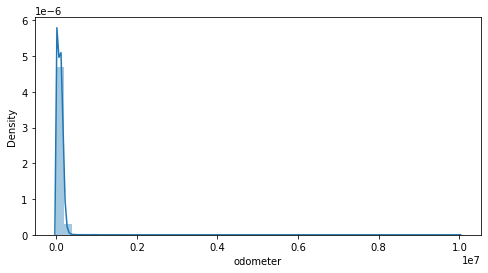

In [27]:
# checking the distribution of odometer column

import seaborn as sns

sns.distplot(df['odometer'].dropna())

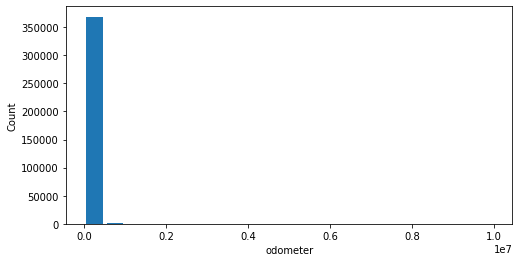

In [28]:
# creating boxplot for odometer column

plt.hist(df.odometer, bins=20, rwidth=0.8)      
plt.xlabel('odometer')
plt.ylabel('Count')
plt.show()

In [29]:
df.describe().applymap(lambda x: f"{x:0.3f}")

,id,price,year,odometer,county,lat,long
count,371787.000,371787.000,371787.000,369652.000,0.000,368413.000,368413.000
mean,7311478150.029,18172.607,2012.211,97957.321,nan,38.534,-94.279
std,4388481.648,12997.286,5.818,145342.068,nan,5.841,18.140
min,7301583321.000,100.000,1990.000,0.000,nan,-84.122,-159.720
25%,7308091642.000,7490.000,2008.000,39928.000,nan,34.756,-110.960
50%,7312600339.000,15000.000,2013.000,89868.000,nan,39.260,-87.948
75%,7315244180.500,26995.000,2017.000,137481.000,nan,42.370,-80.798
max,7317101084.000,60000.000,2022.000,10000000.000,nan,82.253,167.630


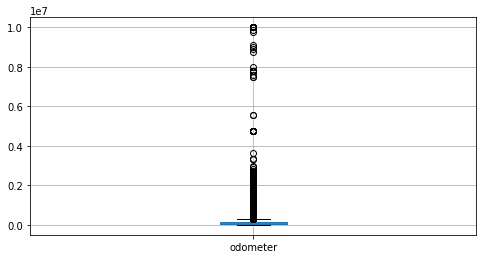

In [30]:
figure=df.boxplot(column="odometer")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


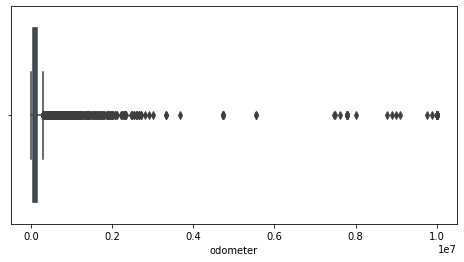

In [31]:
sns.boxplot(df['odometer'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


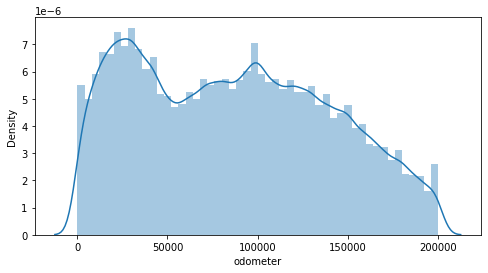

In [32]:
sns.distplot(df[(df.odometer >= 100) & (df.odometer <= 200000)].odometer)

In [33]:
df[df.odometer >= 250000].shape

(6413, 26)

Odometer data is right skewed as per the above graphs. To tackle this data , IQR techinique is implemented

In [34]:
lower_lim_odometer = df['odometer'].quantile(0.25)-(IQR*1.5)
upper_lim_odometer = df['odometer'].quantile(0.75)+(IQR*1.5)
print(lower_lim_odometer), print(upper_lim_odometer)

39914.5
137494.5


(None, None)

In [35]:
lower_lim_odometer = df['odometer'].quantile(0.25)-(IQR*3)
upper_lim_odometer = df['odometer'].quantile(0.75)+(IQR*3)
print(lower_lim_odometer), print(upper_lim_odometer)

39901.0
137508.0


(None, None)

In [36]:
# Removing Outliers in odometer

df = df[(df.odometer >= 100) & (df.odometer <= 250000)]

In [37]:
df.shape

(359668, 26)

In [38]:
# Removing Outliers in year c

#df = df[(df['odometer'] >= lower_lim_odometer) & (df['odometer'] <= upper_lim_odometer)]

In [39]:
df.odometer.max()

250000.0

In [40]:
print("Shape of dataset after Outliers removal in odometer column : ",len(df))

Shape of dataset after Outliers removal in odometer column :  359668


In [41]:
df.describe().applymap(lambda x: f"{x:0.3f}")

,id,price,year,odometer,county,lat,long
count,359668.000,359668.000,359668.000,359668.000,0.000,356440.000,356440.000
mean,7311467840.644,18334.597,2012.320,92464.171,nan,38.548,-94.172
std,4391403.186,12945.459,5.721,58894.061,nan,5.841,18.135
min,7301583321.000,100.000,1990.000,100.000,nan,-81.838,-159.720
25%,7308070247.750,7500.000,2009.000,40529.000,nan,34.764,-110.875
50%,7312576287.500,15590.000,2013.000,89198.000,nan,39.300,-87.865
75%,7315241885.500,27000.000,2017.000,135170.000,nan,42.393,-80.740
max,7317101084.000,60000.000,2022.000,250000.000,nan,82.253,167.630


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359668 entries, 27 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            359668 non-null  int64  
 1   url           359668 non-null  object 
 2   region        359668 non-null  object 
 3   region_url    359668 non-null  object 
 4   price         359668 non-null  int64  
 5   year          359668 non-null  float64
 6   manufacturer  348910 non-null  object 
 7   model         356595 non-null  object 
 8   condition     223255 non-null  object 
 9   cylinders     213034 non-null  object 
 10  fuel          357626 non-null  object 
 11  odometer      359668 non-null  float64
 12  title_status  353075 non-null  object 
 13  transmission  358277 non-null  object 
 14  VIN           227797 non-null  object 
 15  drive         250927 non-null  object 
 16  size          99630 non-null   object 
 17  type          285639 non-null  object 
 18  pai

**Exploratory Data Analysis (EDA)**

In Data Analysis What All Things We Do
1. Missing Values
2. Explore About the Numerical Variables
3. Explore About categorical Variables
4. Finding Relationship between features

In [43]:
df.shape

(359668, 26)

In [44]:
# features with null values

[features for features in df.columns if df[features].isnull().sum()>0]

['manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'description',
 'county',
 'lat',
 'long']

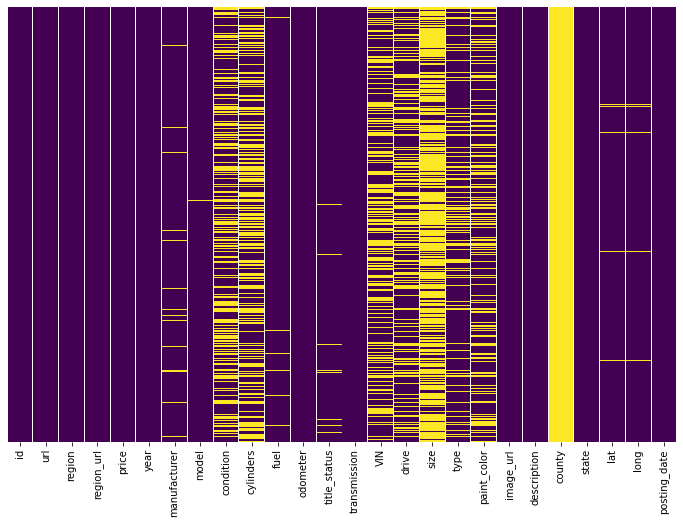

In [45]:
# creating a graph to check null values

plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Country column contains all null values , Drop the column



In [46]:
df.drop(['id','url','region','region_url','VIN','image_url','description','county','state','model','lat','long','posting_date'], axis =1 , inplace = True)

In [47]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 
missing_percentages[missing_percentages!=0]

size            0.722995
cylinders       0.407693
condition       0.379275
drive           0.302337
paint_color     0.289637
type            0.205826
manufacturer    0.029911
title_status    0.018331
fuel            0.005677
transmission    0.003867
dtype: float64

Text(0, 0.5, 'Features')

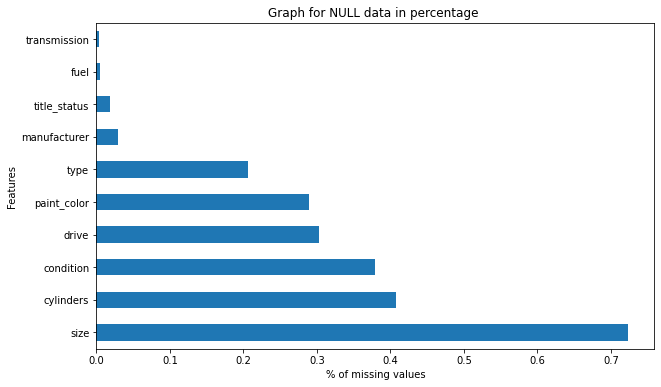

In [48]:
# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**TRANSMISSION**

In [49]:
# transmission column

df['transmission'].isnull().sum()

1391

In [50]:
df['transmission'].value_counts()

automatic    280849
other         60056
manual        17372
Name: transmission, dtype: int64

In [51]:
# Replacing null values in transmission column

df['transmission'] = df['transmission'].fillna(df.transmission.mode()[0])

In [52]:
print("Number of null values :" ,df.transmission.isnull().sum())
print(df.transmission.value_counts())

Number of null values : 0
automatic    282240
other         60056
manual        17372
Name: transmission, dtype: int64


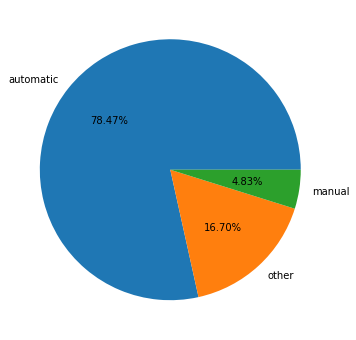

In [53]:
## Pie Chart for transmission column

plt.figure(figsize=(10,6))
plt.pie(df.transmission.value_counts().values,labels=df.transmission.value_counts().index,autopct='%1.2f%%')
plt.show()

In [54]:
# Transmission looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['transmission'] = LabelEncoding.fit_transform(df['transmission'])

In [55]:
df['transmission'].value_counts()

0    282240
2     60056
1     17372
Name: transmission, dtype: int64

Text(0, 0.5, 'Features')

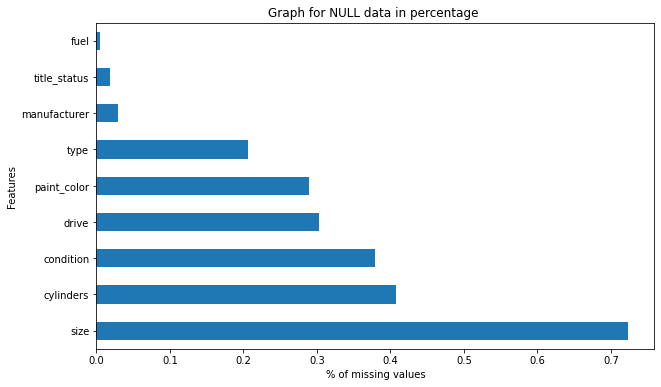

In [56]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 
missing_percentages[missing_percentages!=0]

# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**FUEL**

In [57]:
df['fuel'].isnull().sum()

2042

In [58]:
df['fuel'].value_counts()

gas         304094
other        26652
diesel       20659
hybrid        4713
electric      1508
Name: fuel, dtype: int64

In [59]:
len (df[~ ((df['fuel'] == 'other') | (df['fuel'] == 'gas') | (df['fuel'] == 'diesel') | (df['fuel'] == 'hybrid') | (df['fuel'] == 'electric')) ])

2042

In [60]:
# Replacing null values in fuel column

df['fuel'] = df['fuel'].fillna(df.fuel.mode()[0])

In [61]:
print("Number of null values :" ,df.fuel.isnull().sum())
print(df.fuel.value_counts())

Number of null values : 0
gas         306136
other        26652
diesel       20659
hybrid        4713
electric      1508
Name: fuel, dtype: int64


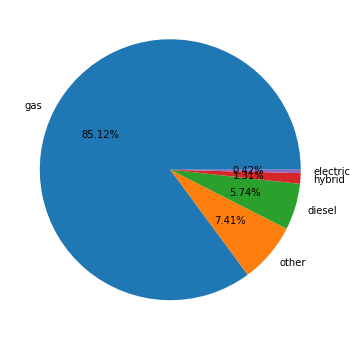

In [62]:
## Pie Chart for fuel column

plt.figure(figsize=(10,6))
plt.pie(df.fuel.value_counts().values,labels=df.fuel.value_counts().index,autopct='%1.2f%%')
plt.show()

In [63]:
# fuel looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['fuel'] = LabelEncoding.fit_transform(df['fuel'])

In [64]:
df['fuel'].value_counts()

2    306136
4     26652
0     20659
3      4713
1      1508
Name: fuel, dtype: int64

Text(0, 0.5, 'Features')

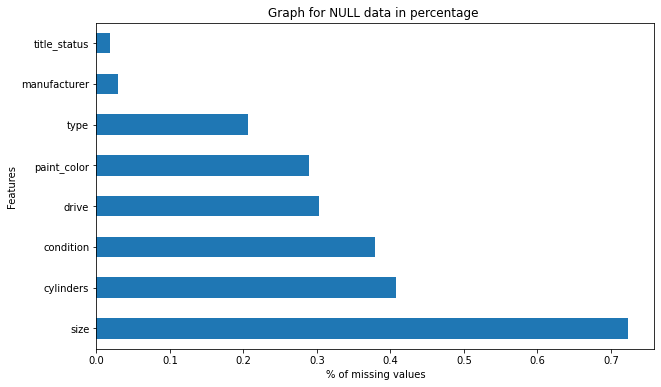

In [65]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 


# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

Text(0, 0.5, 'Features')

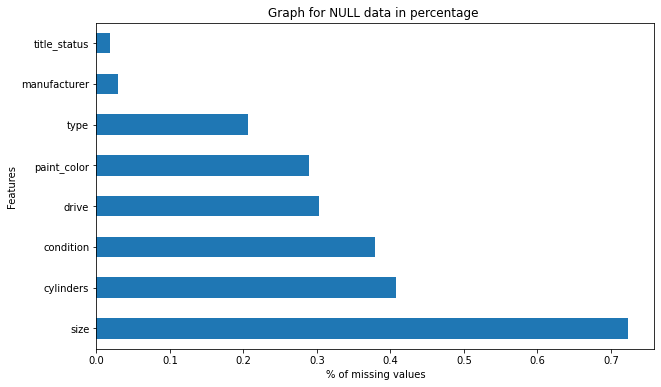

In [66]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 


# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359668 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         359668 non-null  int64  
 1   year          359668 non-null  float64
 2   manufacturer  348910 non-null  object 
 3   condition     223255 non-null  object 
 4   cylinders     213034 non-null  object 
 5   fuel          359668 non-null  int64  
 6   odometer      359668 non-null  float64
 7   title_status  353075 non-null  object 
 8   transmission  359668 non-null  int64  
 9   drive         250927 non-null  object 
 10  size          99630 non-null   object 
 11  type          285639 non-null  object 
 12  paint_color   255495 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 38.4+ MB


**title_status**

In [68]:
df['title_status'].isnull().sum()

6593

In [69]:
df['title_status'].value_counts()

clean         341043
rebuilt         6807
salvage         3559
lien            1311
missing          254
parts only       101
Name: title_status, dtype: int64

In [70]:
df_group_one = df[['year','title_status']]
df_group_one = df_group_one.groupby(['year','title_status'],as_index=False).mean()
df_group_one

,year,title_status
0,1990.0,clean
1,1990.0,missing
2,1990.0,parts only
3,1990.0,rebuilt
4,1990.0,salvage
...,...,...
181,2021.0,rebuilt
182,2021.0,salvage
183,2022.0,clean
184,2022.0,missing


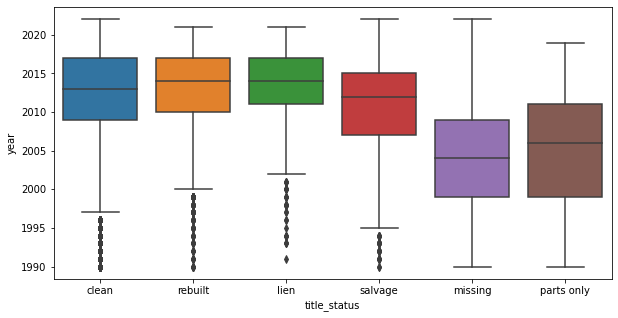

In [71]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.title_status, y=df.year)

In [72]:
print("Year greater than :",df[df.year > 2010].title_status.isnull().sum())
print("Year Inbetween  :",df[(df.year.between(200,2010))].title_status.isnull().sum())
print("Year less than  :",df[(df.year < 2000 )].title_status.isnull().sum())


Year greater than : 4881
Year Inbetween  : 1712
Year less than  : 91


In [73]:
# year > 2010    title_status: clean

df['title_status'] = df[df.year > 2010].title_status.fillna('clean',inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [74]:
# Between ( 2000 , 2010 ) title_status: missing

df['title_status'] = df[df.year.between(2000,2010)].title_status.fillna('missing',inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [75]:
# year < 2000   title_status : parts only

df['title_status'] = df[df.year < 2000].title_status.fillna('parts only')



In [76]:
df.title_status.isnull().sum()

348511

In [77]:
df['title_status'] = df['title_status'].fillna(df['title_status'].mode()[0])

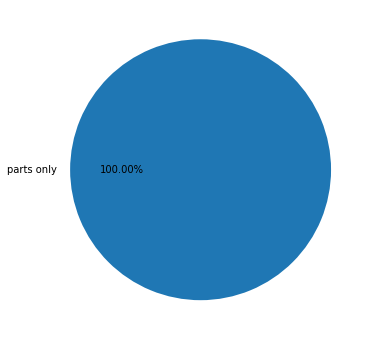

In [78]:
## Pie Chart for title_status column

plt.figure(figsize=(10,6))
plt.pie(df.title_status.value_counts().values,labels=df.title_status.value_counts().index,autopct='%1.2f%%')
plt.show()

In [79]:
# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['title_status'] = LabelEncoding.fit_transform(df['title_status'])

In [80]:
df['title_status'].value_counts()

0    359668
Name: title_status, dtype: int64

Text(0, 0.5, 'Features')

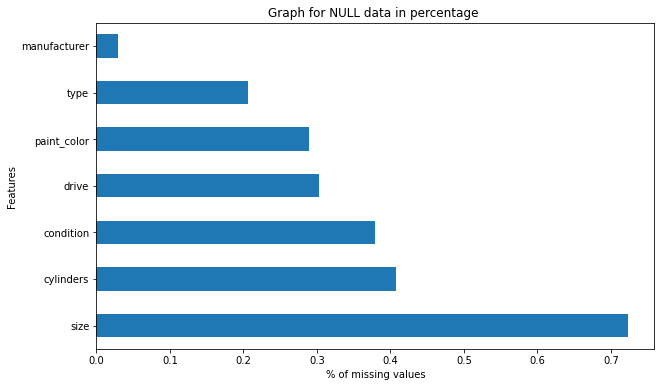

In [81]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 


# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**manufacturer**

In [82]:
df['manufacturer'].isnull().sum()

10758

In [83]:
df['manufacturer'].value_counts()

ford               58228
chevrolet          44274
toyota             29750
honda              19075
nissan             16844
jeep               16331
ram                15096
gmc                13879
bmw                13291
dodge              11311
mercedes-benz       9404
hyundai             9120
subaru              8732
volkswagen          8099
lexus               7503
kia                 7331
audi                6860
cadillac            6017
acura               5549
chrysler            5388
mazda               4869
buick               4825
infiniti            4397
lincoln             3781
volvo               2972
mitsubishi          2907
mini                2215
rover               1809
pontiac             1784
jaguar              1734
porsche             1075
saturn              1047
mercury              953
alfa-romeo           806
tesla                766
fiat                 731
harley-davidson      130
aston-martin          11
land rover            10
ferrari                4


In [84]:
df['manufacturer'] = df['manufacturer'].fillna(df['manufacturer'].mode()[0])

In [85]:
df['manufacturer'].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'buick', 'mercedes-benz', 'bmw',
       'mitsubishi', 'volkswagen', 'porsche', 'kia', 'rover', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'aston-martin', 'land rover', 'morgan', 'ferrari'], dtype=object)

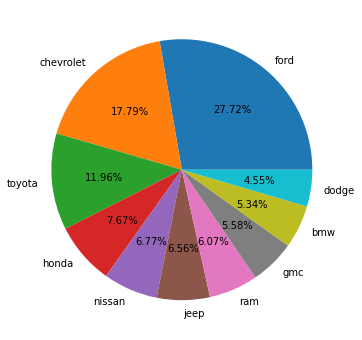

In [86]:
## Pie Chart for TOP 10 manufacturer column

plt.figure(figsize=(10,6))
plt.pie(df.manufacturer.value_counts()[:10].values,labels=df.manufacturer.value_counts()[:10].index,autopct='%1.2f%%')
plt.show()

### " **manufacturer** " is a **Nominal data**, 3 techniques to solve this:
1. ONE HOT ENCODING
2. ONE HOT ENCODING WITH MULTIPLE CATEGORIES
3. MEAN ENCODING

In [87]:
!pip install category_encoders --quiet

     |████████████████████████████████| 86 kB 4.4 MB/s 


In [88]:
# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['manufacturer'] = LabelEncoding.fit_transform(df['manufacturer'])


In [89]:
df

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
27,33590,2014.0,13,good,8 cylinders,2,57923.0,0,2,NaN,NaN,pickup,white
28,22590,2010.0,7,good,8 cylinders,2,71229.0,0,2,NaN,NaN,pickup,blue
29,39590,2020.0,7,good,8 cylinders,2,19160.0,0,2,NaN,NaN,pickup,red
30,30990,2017.0,38,good,8 cylinders,2,41124.0,0,2,NaN,NaN,pickup,red
31,15000,2013.0,12,excellent,6 cylinders,2,128000.0,0,0,rwd,full-size,truck,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,30,good,6 cylinders,2,32226.0,0,2,fwd,NaN,sedan,NaN
426876,30590,2020.0,40,good,NaN,2,12029.0,0,2,fwd,NaN,sedan,red
426877,34990,2020.0,6,good,NaN,0,4174.0,0,2,NaN,NaN,hatchback,white
426878,28990,2018.0,22,good,6 cylinders,2,30112.0,0,2,fwd,NaN,sedan,silver


In [90]:
df.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color'],
      dtype='object')

In [91]:
# Reset Index

df.reset_index(inplace = True)
df.drop('index',axis =1, inplace= True)

In [92]:
df

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,33590,2014.0,13,good,8 cylinders,2,57923.0,0,2,NaN,NaN,pickup,white
1,22590,2010.0,7,good,8 cylinders,2,71229.0,0,2,NaN,NaN,pickup,blue
2,39590,2020.0,7,good,8 cylinders,2,19160.0,0,2,NaN,NaN,pickup,red
3,30990,2017.0,38,good,8 cylinders,2,41124.0,0,2,NaN,NaN,pickup,red
4,15000,2013.0,12,excellent,6 cylinders,2,128000.0,0,0,rwd,full-size,truck,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359663,23590,2019.0,30,good,6 cylinders,2,32226.0,0,2,fwd,NaN,sedan,NaN
359664,30590,2020.0,40,good,NaN,2,12029.0,0,2,fwd,NaN,sedan,red
359665,34990,2020.0,6,good,NaN,0,4174.0,0,2,NaN,NaN,hatchback,white
359666,28990,2018.0,22,good,6 cylinders,2,30112.0,0,2,fwd,NaN,sedan,silver


**condition**



In [93]:
df['condition'].isnull().sum()

136413

In [94]:
df['condition'].value_counts()

good         112094
excellent     86649
like new      18592
fair           4787
new             679
salvage         454
Name: condition, dtype: int64

In [95]:
df_group_one = df[['condition','year']]
df_group_one = df_group_one.groupby(['condition','year'],as_index=False).count()
df_group_one

,condition,year
0,excellent,1990.0
1,excellent,1991.0
2,excellent,1992.0
3,excellent,1993.0
4,excellent,1994.0
...,...,...
190,salvage,2017.0
191,salvage,2018.0
192,salvage,2019.0
193,salvage,2020.0


In [96]:
df[df.condition == 'good'].year.value_counts()

2018.0    13988
2017.0    11299
2019.0    10123
2020.0     9738
2016.0     7881
2013.0     7209
2014.0     6425
2015.0     6335
2012.0     5045
2011.0     4107
2008.0     3572
2010.0     3329
2007.0     3186
2006.0     3008
2009.0     2657
2005.0     2507
2004.0     2276
2003.0     1857
2002.0     1510
2001.0     1227
2000.0      972
1999.0      808
1998.0      616
1997.0      513
1996.0      349
1995.0      344
1994.0      312
1993.0      212
1991.0      199
1992.0      179
1990.0      170
2021.0      139
2022.0        2
Name: year, dtype: int64

In [97]:
df['condition'] = df['condition'].fillna(df['condition'].mode()[0])

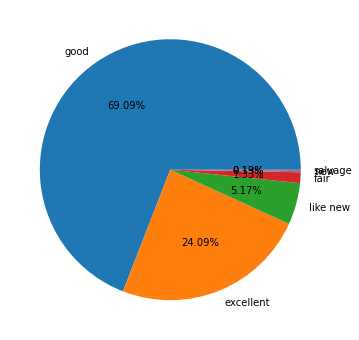

In [98]:
## Pie Chart for condition column

plt.figure(figsize=(10,6))
plt.pie(df.condition.value_counts().values,labels=df.condition.value_counts().index,autopct='%1.2f%%')
plt.show()

In [99]:
# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['condition'] = LabelEncoding.fit_transform(df['condition'])

**cylinder**

In [100]:
df['cylinders'].isnull().sum()

146634

In [101]:
df['cylinders'].value_counts()

6 cylinders     83251
4 cylinders     69240
8 cylinders     56501
5 cylinders      1553
10 cylinders     1028
other             798
3 cylinders       538
12 cylinders      125
Name: cylinders, dtype: int64

In [102]:
# splitting the cylinder column

df['cylinders'] = df['cylinders'].str.split(' ').str[0]

In [103]:
# filling null values

df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode()[0])

In [104]:
# replacing others value in cylinder column with 0
df['cylinders'] = df['cylinders'].replace(['other'],'0')


In [105]:
# changing into integer column

df['cylinders'] = df['cylinders'].astype('int')

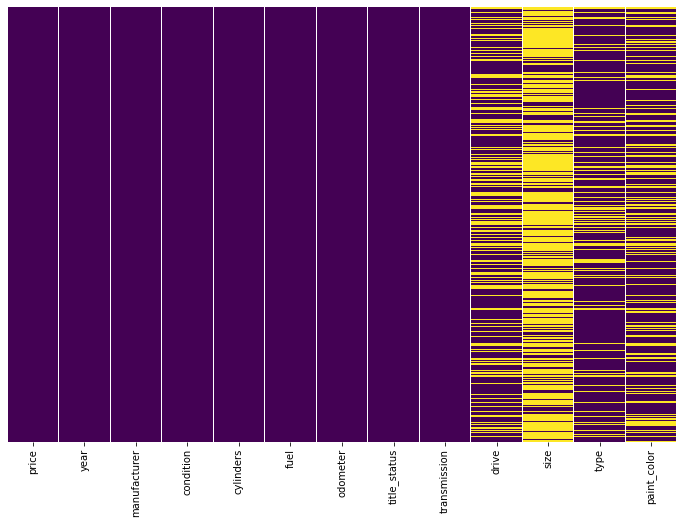

In [106]:
# creating a graph to check null values

plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0, 0.5, 'Features')

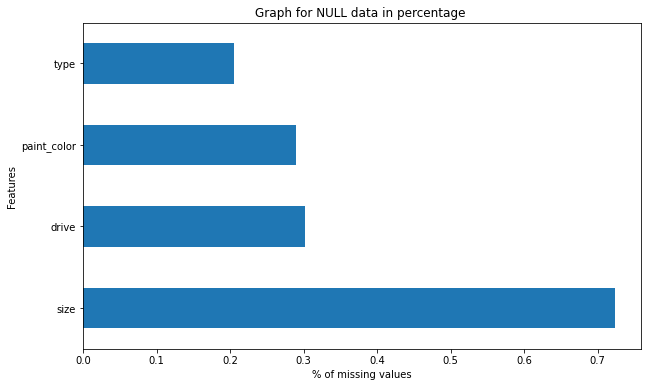

In [107]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 

# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**drive** 

In [108]:
df['drive'].isnull().sum()

108741

In [109]:
df['drive'].value_counts()

4wd    110446
fwd     93880
rwd     46601
Name: drive, dtype: int64

In [110]:
df['drive'] = df['drive'].fillna(df['drive'].mode()[0])

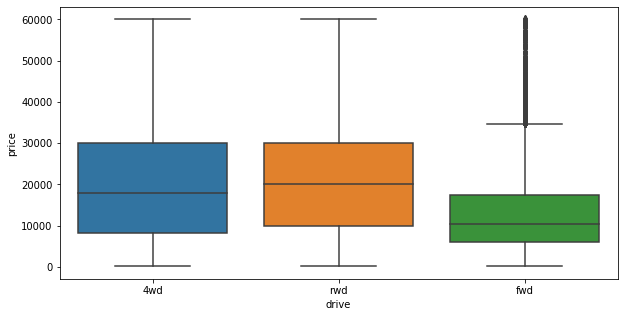

In [111]:
plt.figure(figsize=(10,5))
sns.boxplot(x="drive", y="price", data=df)

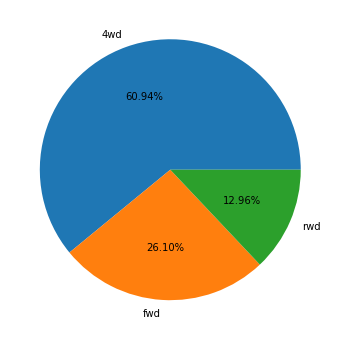

In [112]:
## Pie Chart for drive column

plt.figure(figsize=(10,6))
plt.pie(df.drive.value_counts().values,labels=df.drive.value_counts().index,autopct='%1.2f%%')
plt.show()

In [113]:
# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['drive'] = LabelEncoding.fit_transform(df['drive'])

**type**

In [114]:
df['type'].isnull().sum()

74029

In [115]:
df['type'].value_counts()

sedan          76680
SUV            67080
pickup         37678
truck          26576
other          18574
hatchback      15495
coupe          15492
wagon           9527
van             7294
convertible     6014
mini-van        4375
offroad          437
bus              417
Name: type, dtype: int64

In [116]:
df['type'] = df['type'].fillna(df['type'].mode()[0])

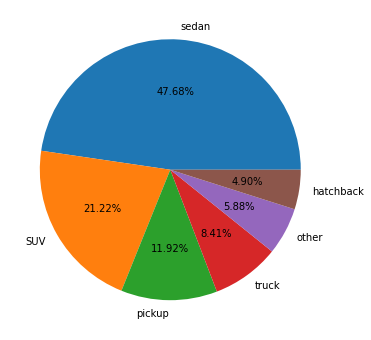

In [117]:
## Pie Chart for top 6 type column

plt.figure(figsize=(10,6))
plt.pie(df['type'].value_counts().values[:6],labels=df['type'].value_counts().index[:6],autopct='%1.2f%%')
plt.show()

In [118]:

# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['type'] = LabelEncoding.fit_transform(df['type'])

Text(0, 0.5, 'Features')

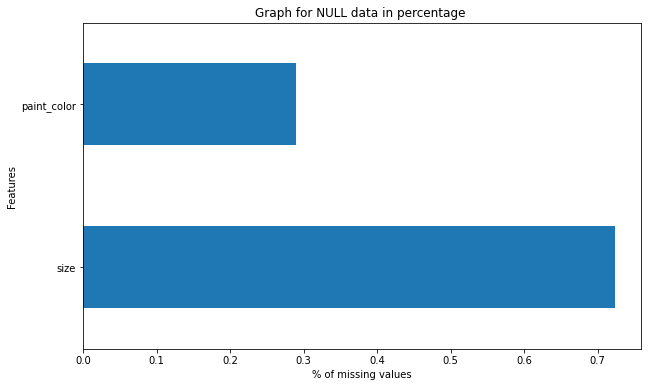

In [119]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 

# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

Size column contains about 70 percent of the Null values, dropping this column for now

In [120]:
# size column drop

df.drop('size' , axis =1 , inplace = True)

**paint_color**         

In [121]:
df['paint_color'].isnull().sum()

104173

In [122]:
df['paint_color'].value_counts()

white     67054
black     54816
silver    38235
blue      27059
red       26166
grey      21326
green      5988
brown      5609
custom     5596
orange     1551
yellow     1537
purple      558
Name: paint_color, dtype: int64

In [123]:
df['paint_color'] = df['paint_color'].fillna(df['paint_color'].mode()[0])

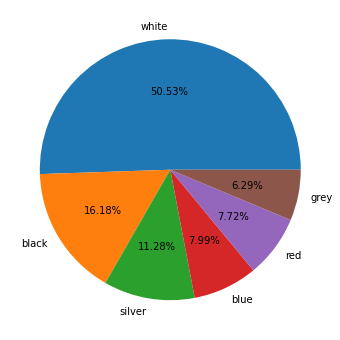

In [124]:
## Pie Chart for top 6 paint_color column

plt.figure(figsize=(10,6))
plt.pie(df['paint_color'].value_counts().values[:6],labels=df['paint_color'].value_counts().index[:6],autopct='%1.2f%%')
plt.show()

In [125]:
# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['paint_color'] = LabelEncoding.fit_transform(df['paint_color'])

In [126]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentages

price           0.0
year            0.0
manufacturer    0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
dtype: float64

In [127]:
X_data = df.drop('price',axis =1 )
y_data = df['price']

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [129]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(287734, 11) (287734,)
(71934, 11) (71934,)


In [130]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [131]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [132]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
import numpy as np

n_est = [10,20,30,40,50,60,70,80,90,100,200,300]
for i in n_est:
  regressor = RandomForestRegressor(n_estimators=i, random_state=42)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print('n_estimators:',i)
  print('Model Score:',regressor.score(X_test,y_test))
  print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
  print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
  print('Root Mean Squared Error:' , round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

n_estimators: 10
Model Score: 0.8680466847436035
Mean Absolute Error: 2250.95
Mean Squared Error: 22216328.92
Root Mean Squared Error: 4713.42
n_estimators: 20
Model Score: 0.8740790724301561
Mean Absolute Error: 2188.88
Mean Squared Error: 21200685.55
Root Mean Squared Error: 4604.42
n_estimators: 30
Model Score: 0.8763494045147997
Mean Absolute Error: 2166.2
Mean Squared Error: 20818440.94
Root Mean Squared Error: 4562.72
n_estimators: 40
Model Score: 0.8773201867879254
Mean Absolute Error: 2152.83
Mean Squared Error: 20654995.11
Root Mean Squared Error: 4544.78
n_estimators: 50
Model Score: 0.8779997713559857
Mean Absolute Error: 2146.17
Mean Squared Error: 20540576.81
Root Mean Squared Error: 4532.17
n_estimators: 60
Model Score: 0.878157970222114
Mean Absolute Error: 2141.71
Mean Squared Error: 20513941.65
Root Mean Squared Error: 4529.23
n_estimators: 70
Model Score: 0.8783068319598151
Mean Absolute Error: 2138.91
Mean Squared Error: 20488878.53
Root Mean Squared Error: 4526.46
n

In [133]:
regressor.score(X_test,y_test)

0.8792095400012689

In [134]:
# Multiple Linear Regression

from sklearn.linear_model import LinearRegression

Multi_Linear_model = LinearRegression()
Multi_Linear_model.fit(X_train, y_train)
y_pred = Multi_Linear_model.predict(X_test)


In [135]:
from sklearn.metrics import accuracy_score

print('Model Score:',Multi_Linear_model.score(X_test,y_test))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Model Score: 0.5271539945379765
Mean Absolute Error: 6604.1
Mean Squared Error: 79610749.94
Root Mean Squared Error: 8922.49
